# 🚢 Titanic Survival Prediction with Logistic Regression
This notebook demonstrates how to use Logistic Regression to predict Titanic survivors based on passenger data.

## 📥 Step 1: Load and Inspect the Dataset

In [1]:

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧹 Step 2: Preprocess the Data

In [2]:
# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
df = df[features + ['Survived']]
df.head()

,Pclass,Sex,Age,Fare,SibSp,Parch,Survived
0,3,male,22.0,7.2500,1,0,0
1,1,female,38.0,71.2833,1,0,1
2,3,female,26.0,7.9250,0,0,1
3,1,female,35.0,53.1000,1,0,1
4,3,male,35.0,8.0500,0,0,0


In [5]:
df.shape

(891, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [3]:
df.describe()

,Pclass,Age,Fare,SibSp,Parch,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.523008,0.381594,0.383838
std,0.836071,14.526497,49.693429,1.102743,0.806057,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,38.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,512.329200,8.000000,6.000000,1.000000


In [6]:


# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)



/var/folders/19/8bk5lhzj2b7crktgv8zcc9b00000gn/T/ipykernel_30564/2571709303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
df.head()

,Pclass,Sex,Age,Fare,SibSp,Parch,Survived
0,3,male,22.0,7.2500,1,0,0
1,1,female,38.0,71.2833,1,0,1
2,3,female,26.0,7.9250,0,0,1
3,1,female,35.0,53.1000,1,0,1
4,3,male,35.0,8.0500,0,0,0


In [ ]:
sex_male , sex_female = 
1, 0
0,1
0,1

In [ ]:
#onde hot encoding
#label encoding

In [9]:
# Encode categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df.head()


,Pclass,Sex,Age,Fare,SibSp,Parch,Survived
0,3,0,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,1,0,1
2,3,1,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,1,0,1
4,3,0,35.0,8.0500,0,0,0


## 🔀 Step 3: Train-Test Split

In [ ]:
100 , 0-80 train , 81-100 test


In [10]:

from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🧠 Step 4: Train Logistic Regression Model

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


## 📈 Step 5: Evaluate the Model

In [12]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8100558659217877


In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[92 13]
 [21 53]]


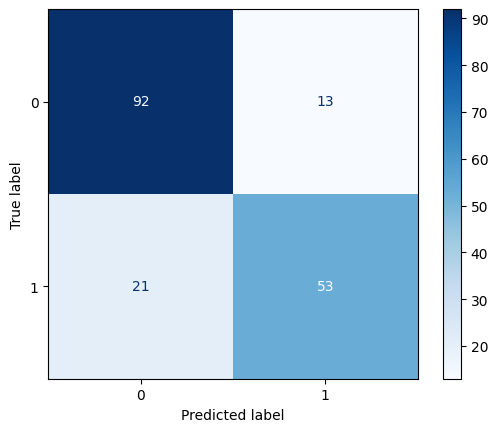

In [15]:
# visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

In [22]:
92/105

0.8761904761904762

In [ ]:
113 - 92 - 0.81

In [ ]:
105 - postive - actual 
60 - negative 

165 - 

113 - positive

In [ ]:
policy , heath

In [ ]:
preccision = 92/(92+21) 


recall = 92/(92+13)

recall = model pred postive / actual positive

precis = model pred postive / model total postive

0.8141592920353983

In [19]:
(92+53)/(92+53+21+13)

0.8100558659217877

In [ ]:
False Negative = Positive 

False Positive = Negative


In [ ]:
0,1 = Postive , Negative

1- True Positive , False Positive
2- True Negative , False Negative

In [17]:
# print the number 0, 1 in y_test
print("Number of 0s in y_test:", np.sum(y_test == 0))
print("Number of 1s in y_test:", np.sum(y_test == 1))

Number of 0s in y_test: 105
Number of 1s in y_test: 74


In [ ]:
 Precision = TP / (TP + FP)
  -> How many predicted survivors actually survived?
- Recall = TP / (TP + FN)
  -> How many actual survivors did we identify?
- F1 Score = 2 * (Precision * Recall) / (Precision + Recall)


In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
98% , 98 of 100

1- model is giving more FP, Fraud
1- 80 ,20 - custmore - profits

In [ ]:
0       0.81      0.97      0.84

In [ ]:
95 %  100 - 95 - fraud

recall =80 , 20 fraud missed --losess

## 🎯 Precision & Recall in Insurance Fraud Detection

In binary classification (e.g., predicting **fraudulent insurance claims**), we evaluate model performance using **Precision** and **Recall**.

---

### 📦 Confusion Matrix

|                     | Predicted Fraud | Predicted Not Fraud |
|---------------------|-----------------|----------------------|
| **Actual Fraud**    | ✅ TP            | ❌ FN                |
| **Actual Not Fraud**| ❌ FP            | ✅ TN                |

---

### 🔍 Precision

> Of all claims predicted as **fraud**, how many were **actually fraud**?

\\[
\text{Precision} = \frac{TP}{TP + FP}
\\]

- **High precision** = few false alarms  
- Important when investigating **false positives** is costly or harms customer trust

---

### 🎯 Recall

> Of all **actual frauds**, how many did the model **correctly identify**?

\\[
\text{Recall} = \frac{TP}{TP + FN}
\\]

- **High recall** = few missed frauds  
- Important when missing fraud leads to **losses or risks**

---

### ⚖️ Trade-Off in Insurance

| Goal                                      | Focus Metric |
|-------------------------------------------|--------------|
| Avoid falsely accusing honest customers   | Precision    |
| Catch every possible fraud case           | Recall       |
| Balance both concerns                     | F1 Score     |

---

### 🧪 Example

Imagine 1000 insurance claims:
- 100 are actual fraud
- Model flags 120 as fraud:
  - 80 are correct (**TP**)
  - 40 are incorrect (**FP**)
  - 20 frauds are missed (**FN**)

\\[
\text{Precision} = \frac{80}{80 + 40} = 0.667 \quad (66.7\%)
\\]

\\[
\text{Recall} = \frac{80}{80 + 20} = 0.8 \quad (80\%)
\\]

---

### ✅ F1 Score (Balanced Metric)

\\[
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\\]

- Use F1 when you want a **balance** between catching fraud and avoiding false flags.


## 📊 Step 6: Interpret the Model

In [23]:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
1,Sex,2.610552
3,Fare,0.003434
2,Age,-0.031450
5,Parch,-0.125206
4,SibSp,-0.315760
0,Pclass,-0.928176


## ✅ Summary
- Logistic Regression is ideal for binary classification tasks like Titanic survival.
- Key steps: preprocessing, model fitting, evaluation.
- We saw that features like `Sex` and `Pclass` strongly influence survival.

## 🧪 Step 7: ROC Curve & AUC Score

In [25]:
y_prob[:5]

array([0.0811376 , 0.2371274 , 0.14684498, 0.89847168, 0.67597078])

In [31]:
# threhold = 0.7
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.7).astype(int)
y_pred[:5]

array([0, 0, 0, 1, 0])

In [30]:
print(list(y_test[:5]))

[1, 0, 0, 1, 1]


In [ ]:
.5 = 4/5 = 0.8
.7 = 3/5 = 0.6

In [27]:
1 - y_prob[:5]

array([0.9188624 , 0.7628726 , 0.85315502, 0.10152832, 0.32402922])

In [26]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [ ]:
0 - 0.4 
1 -0.6

default = 0.5
.1,.2,.3,.4,.5,.6,.7,.8,.9,1

# roc curve example


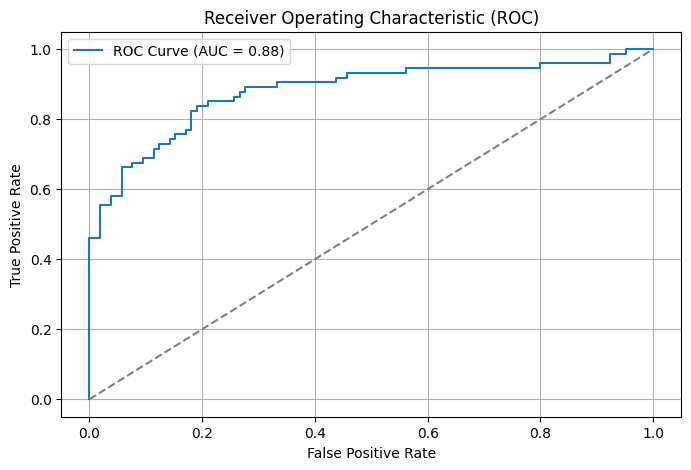

In [24]:

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()


## 🔧 Step 8: Hyperparameter Tuning with GridSearchCV

In [ ]:
# get model parameters

model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 1.5],
    'solver': ['liblinear', 'lbfgs'],
    "max_iter" : [100, 200, 300]
}

grid_model = GridSearchCV(LogisticRegression(), param_grid, cv=2, scoring='accuracy')
grid_model.fit(X_train, y_train)

print("Best Parameters:", grid_model.best_params_)
print("Best Cross-Validated Accuracy:", grid_model.best_score_)


Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8047752808988764
